DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 500

data = {
    'Patient_ID': np.arange(1, n + 1),
    'Age': np.random.randint(10, 90, size=n),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'Blood_Pressure': np.random.normal(120, 15, size=n),
    'Cholesterol': np.random.normal(200, 30, size=n),
    'Diagnosis': np.random.choice(['Diabetes', 'Hypertension', 'None'], size=n, p=[0.3, 0.4, 0.3])
}

df = pd.DataFrame(data)

# Inject some missing values
for col in ['Blood_Pressure', 'Cholesterol']:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

df.loc[df.sample(frac=0.05).index, 'Age'] = np.nan
df.to_csv("hospital_patients.csv", index=False)


## Questions to Solve:

1. Which columns have missing values? What is their %?

2. What imputation method would you apply for each, and why? (e.g., mean, median, groupwise, predictive)

3. Perform imputation and compare the effect of different strategies for at least one column.

4. After imputation, plot distributions to check if anything changed drastically.

5. Share 2 real-world risks or consequences of poor imputation in healthcare datasets.



In [2]:
df.head()

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diagnosis
0,1,61.0,Female,122.609495,158.909055,Hypertension
1,2,24.0,Male,133.618079,185.774771,Diabetes
2,3,81.0,Male,119.868142,159.659437,None
3,4,70.0,Male,126.771168,188.894881,Diabetes
4,5,30.0,Male,132.237774,189.901318,Hypertension


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      500 non-null    int64  
 1   Age             475 non-null    float64
 2   Gender          500 non-null    object 
 3   Blood_Pressure  450 non-null    float64
 4   Cholesterol     450 non-null    float64
 5   Diagnosis       500 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 23.6+ KB


In [4]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Patient_ID         0.0
Age                5.0
Gender             0.0
Blood_Pressure    10.0
Cholesterol       10.0
Diagnosis          0.0
dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

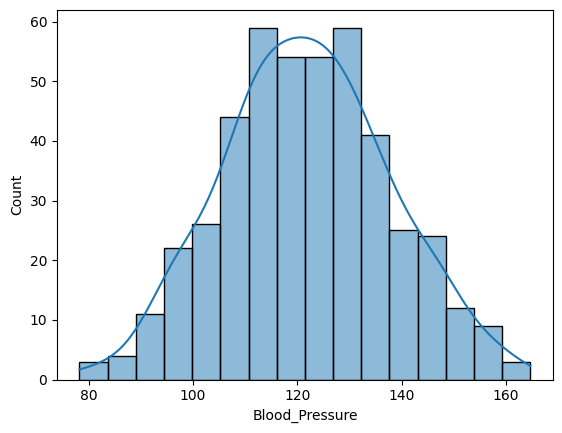

In [6]:
sns.histplot(df['Blood_Pressure'], kde=True)  # before imputation
plt.show()

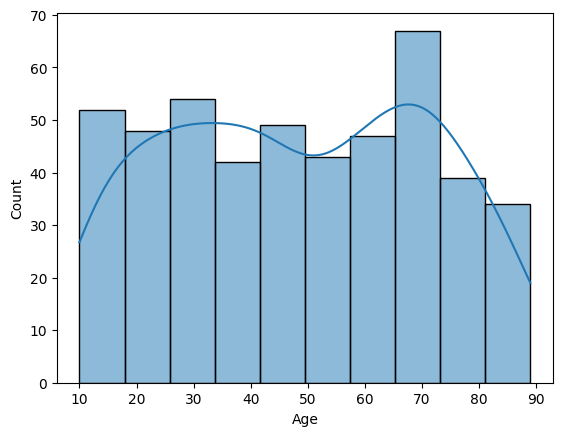

In [7]:
sns.histplot(df['Age'], kde=True)  # before imputation
plt.show()

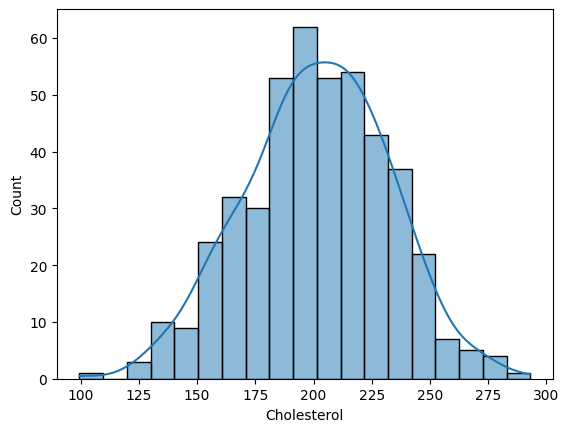

In [8]:
sns.histplot(df['Cholesterol'], kde=True)  # before imputation
plt.show()

In [9]:
df.head()

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diagnosis
0,1,61.0,Female,122.609495,158.909055,Hypertension
1,2,24.0,Male,133.618079,185.774771,Diabetes
2,3,81.0,Male,119.868142,159.659437,None
3,4,70.0,Male,126.771168,188.894881,Diabetes
4,5,30.0,Male,132.237774,189.901318,Hypertension


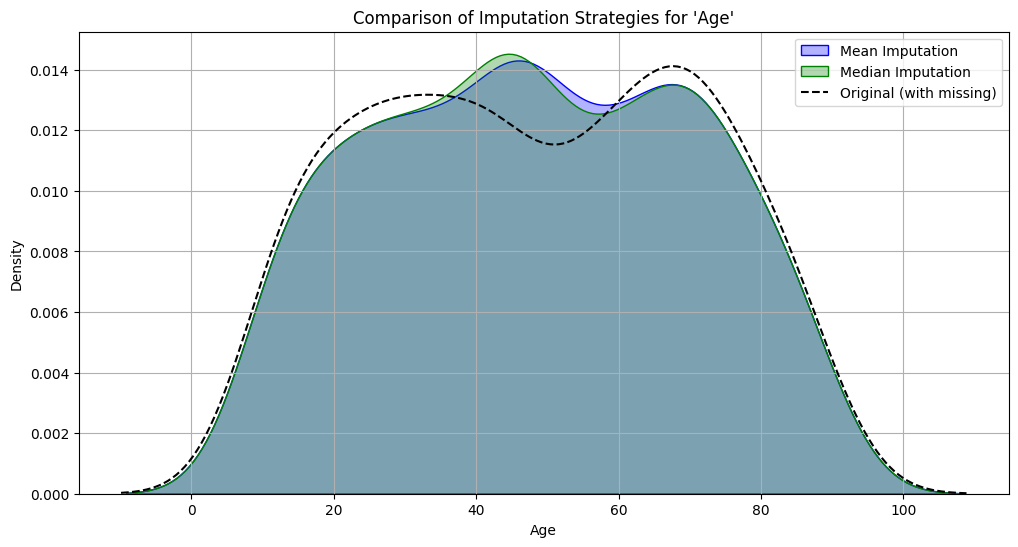

In [10]:
# Apply Mean and Median Imputation
df_mean = df.copy()
df_median = df.copy()

df_mean['Age'] = df_mean['Age'].fillna(df_mean['Age'].mean())
df_median['Age'] = df_median['Age'].fillna(df_median['Age'].median())



# Plotting Comparison
plt.figure(figsize=(12, 6))

sns.kdeplot(df_mean['Age'], label='Mean Imputation', fill=True, color='blue', alpha=0.3)
sns.kdeplot(df_median['Age'], label='Median Imputation', fill=True, color='green', alpha=0.3)
sns.kdeplot(df['Age'].dropna(), label='Original (with missing)', color='black', linestyle='--')

plt.title("Comparison of Imputation Strategies for 'Age'")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# As blood pressure and cholesterol are continuous variables, we can use mean imputation
df['Blood_Pressure']=df['Blood_Pressure'].fillna(df['Blood_Pressure'].mean())
df['Cholesterol']=df['Cholesterol'].fillna(df['Cholesterol'].mean())

In [ ]:
# Use Median Imputation
# Because the data has skewness and multiple peaks, 
# median is robust to outliers and works well with non-normal distributions.
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      500 non-null    int64  
 1   Age             500 non-null    float64
 2   Gender          500 non-null    object 
 3   Blood_Pressure  500 non-null    float64
 4   Cholesterol     500 non-null    float64
 5   Diagnosis       500 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 23.6+ KB


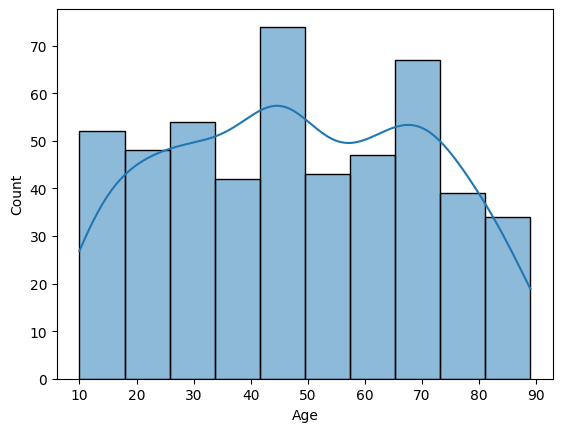

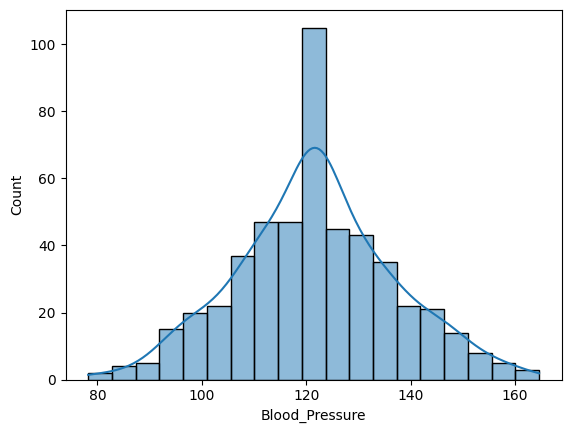

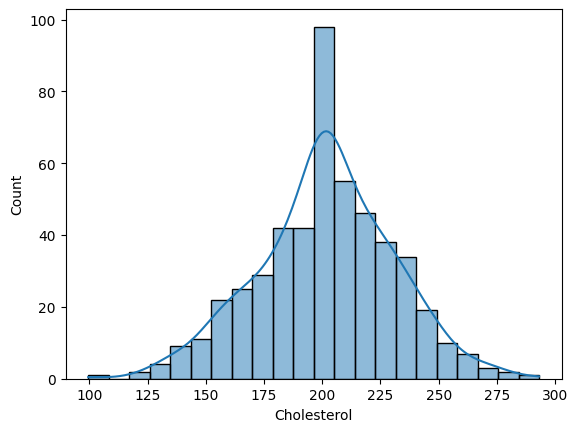

In [14]:
# After imputation
sns.histplot(df['Age'], kde=True)
plt.show()
sns.histplot(df['Blood_Pressure'], kde=True)
plt.show()
sns.histplot(df['Cholesterol'], kde=True) 
plt.show()